<a href="https://colab.research.google.com/github/fadhlijahfal1/Analisis-Klaster-Dalam-Menentukan-Jenis-Musik-Terbaik-Dari-Karakteristik-Irama-Pada-Dataset-Spotify/blob/main/Analisis_Klaster_Dalam_Menentukan_Jenis_Musik_Terbaik_Berdasarkan_Karakteristik_Irama_Pada_Dataset_Spotify_Track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# LOAD DATA

In [ ]:
df = pd.read_csv('/content/spotify_track.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# FEATURE SELECTION

In [ ]:
fitur_audio = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'duration_ms'
]

X = df[fitur_audio]

# HANDLING MISSING VALUE

In [ ]:
X = X.fillna(X.mean())

# SCALING DATA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=fitur_audio)

print("Data siap untuk di-cluster!")

Data siap untuk di-cluster!


# ELBOW METHOD (TENTUKAN JUMLAH CLUSTER)

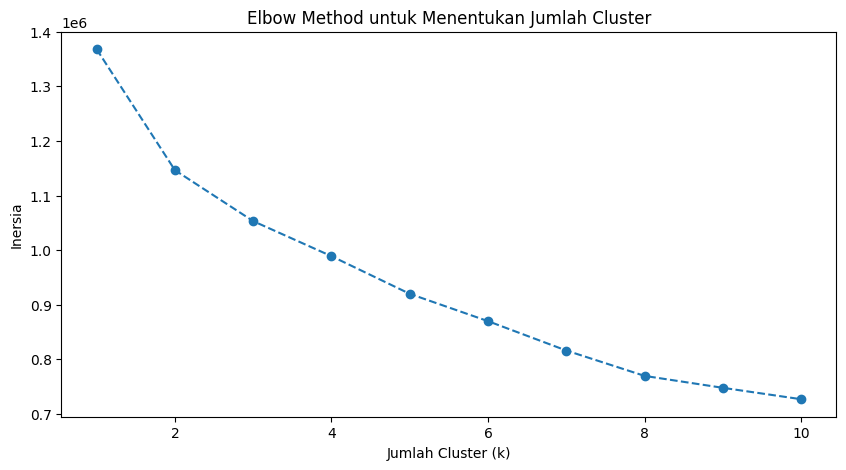

In [ ]:
# Menghitung Inersia untuk k=1 sampai k=10
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(10, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia')
plt.show()

# MODELLING & REDUKSI DIMENSI

In [ ]:
# 1. Eksekusi K-Means dengan k=5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_df)

# Masukkan hasil label ke dataframe asli untuk referensi
df['cluster_raw'] = cluster_labels

# 2. Reduksi Dimensi dengan PCA (agar bisa di-plot 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled_df)

# Simpan hasil PCA ke kolom baru
df['pca_1'] = pca_components[:, 0]
df['pca_2'] = pca_components[:, 1]

# PROFILING & NAME CLUSTER

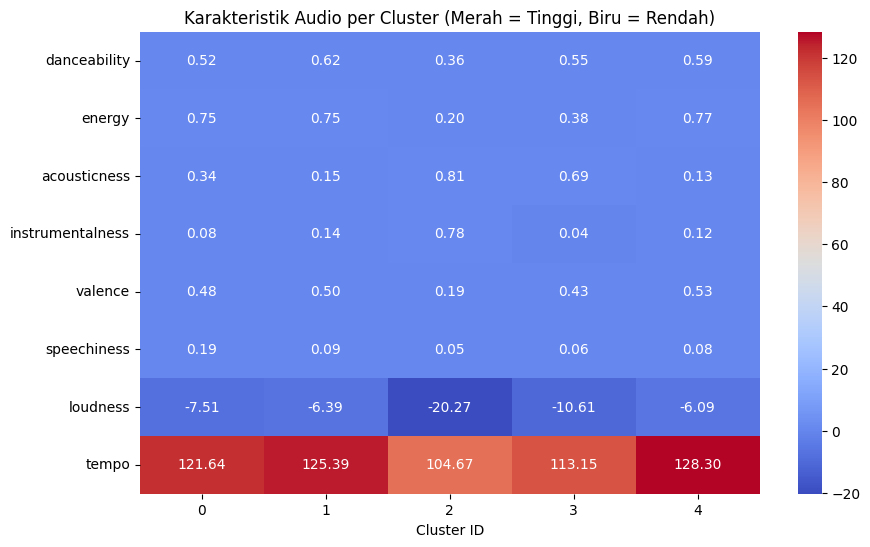

In [ ]:
# --- STEP 4: PROFILING DENGAN HEATMAP ---

# Pilih kolom fitur utama untuk dianalisis (biar tidak pusing melihat semua)
kolom_analisis = [
    'danceability', 'energy', 'acousticness', 'instrumentalness',
    'valence', 'speechiness', 'loudness', 'tempo'
]

# Hitung rata-rata tiap fitur berdasarkan Cluster
cluster_profile = df.groupby('cluster_raw')[kolom_analisis].mean()

# Tampilkan Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Karakteristik Audio per Cluster (Merah = Tinggi, Biru = Rendah)')
plt.xlabel('Cluster ID')
plt.show()

# VISUALISASI

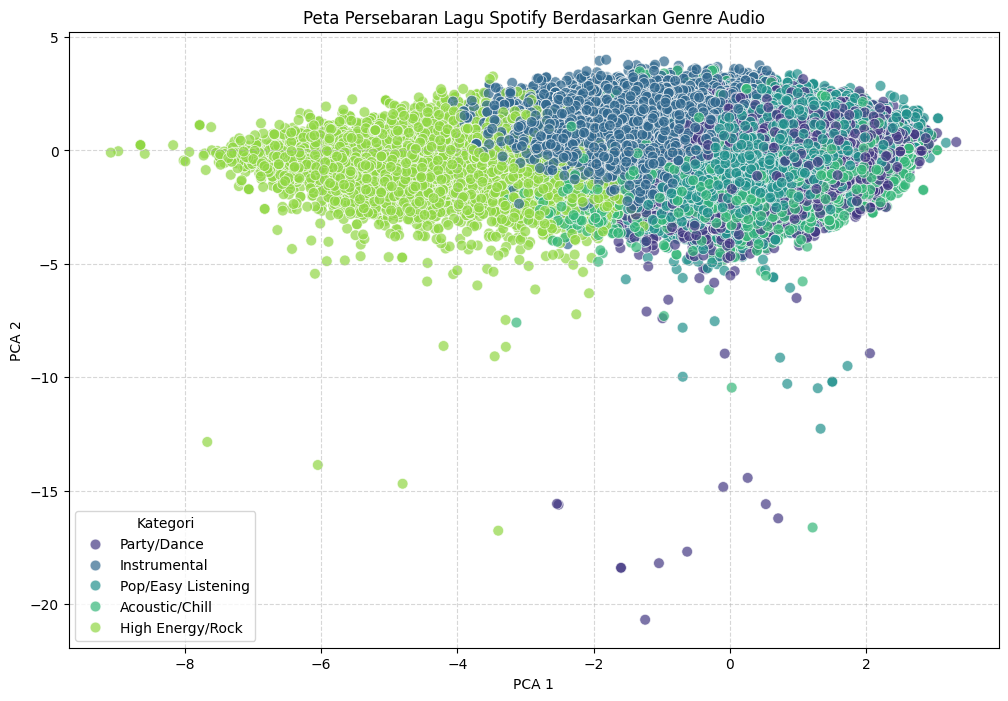

Step 5 Selesai: Visualisasi mapping berhasil.


In [ ]:
# --- STEP 5: NAMING & VISUALIZATION ---

# 1. Mapping Nama (SESUAIKAN BAGIAN INI DENGAN HASIL HEATMAP ANDA!)
nama_cluster = {
    0: 'Acoustic/Chill',      # Misal: Acousticness tinggi
    1: 'Party/Dance',         # Misal: Danceability tinggi
    2: 'High Energy/Rock',    # Misal: Energy & Loudness tinggi
    3: 'Instrumental',        # Misal: Instrumentalness tinggi
    4: 'Pop/Easy Listening'   # Sisanya
}

# Terapkan nama ke DataFrame
df['cluster_name'] = df['cluster_raw'].map(nama_cluster)

# 2. Visualisasi Scatter Plot Akhir
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x='pca_1', y='pca_2',
    hue='cluster_name', palette='viridis', s=60, alpha=0.7
)
plt.title('Peta Persebaran Lagu Spotify Berdasarkan Genre Audio')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Kategori')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Step 5 Selesai: Visualisasi mapping berhasil.")

# BOX PLOT

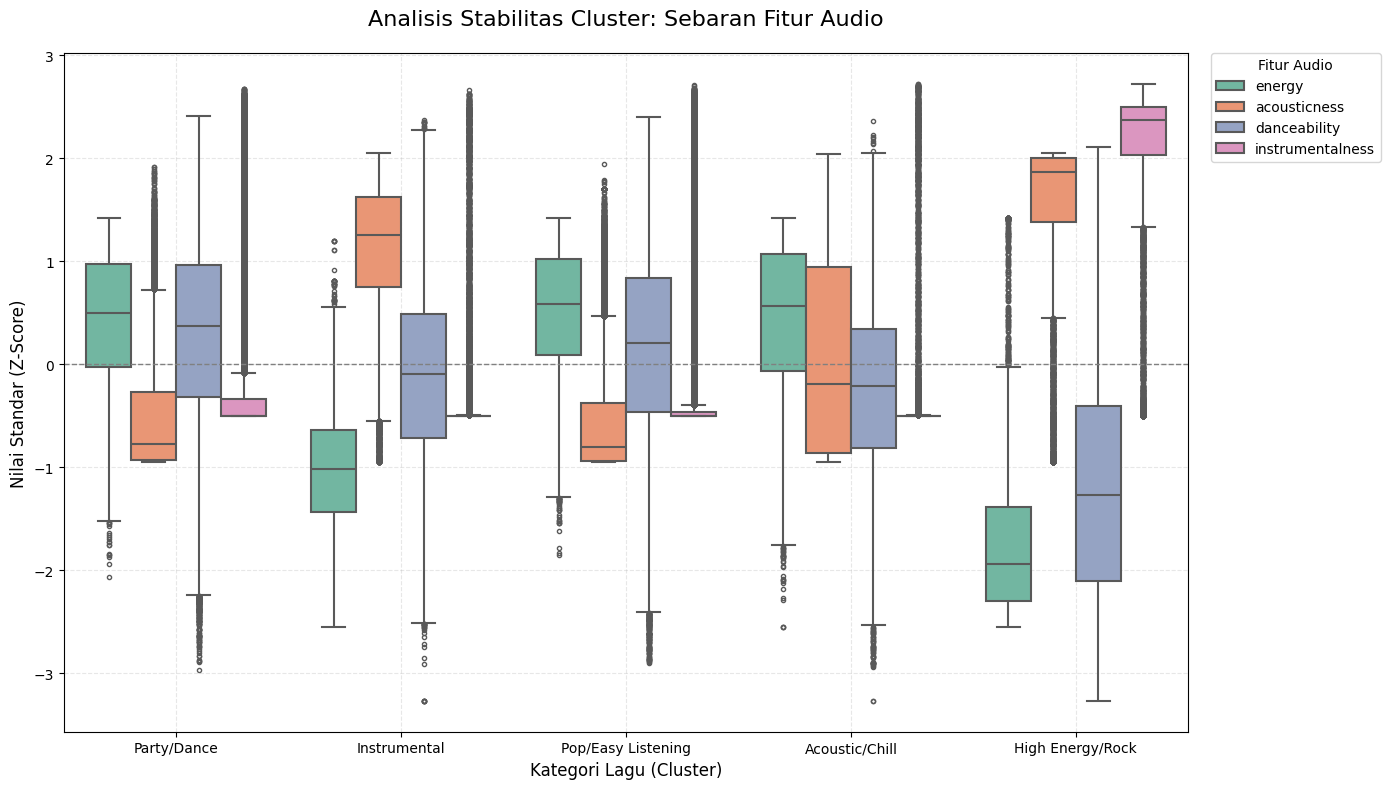

In [ ]:
# --- VISUALISASI: BOX PLOT (DENGAN LEGENDA DI LUAR) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PERSIAPAN DATA (Pastikan X_scaled_df dan df sudah ada dari step sebelumnya)
plot_data = X_scaled_df.copy()
plot_data['cluster_name'] = df['cluster_name']

# 2. MELTING
fitur_pilihan = ['energy', 'acousticness', 'danceability', 'instrumentalness']
df_melt = pd.melt(
    plot_data,
    id_vars=['cluster_name'],
    value_vars=fitur_pilihan,
    var_name='Fitur Audio',
    value_name='Nilai (Standardized)'
)

# 3. PLOTTING
plt.figure(figsize=(14, 8)) # Ukuran kanvas

sns.boxplot(
    data=df_melt,
    x='cluster_name',
    y='Nilai (Standardized)',
    hue='Fitur Audio',
    palette='Set2',
    linewidth=1.5,
    fliersize=3
)

# Kosmetik Grafik
plt.title('Analisis Stabilitas Cluster: Sebaran Fitur Audio', fontsize=16, pad=20)
plt.xlabel('Kategori Lagu (Cluster)', fontsize=12)
plt.ylabel('Nilai Standar (Z-Score)', fontsize=12)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.3)

# --- BAGIAN PERBAIKANNYA DI SINI ---
# bbox_to_anchor=(1.02, 1) artinya: Geser ke kanan (X=1.02) dan di atas (Y=1)
# loc='upper left' artinya: Titik referensi box legendnya adalah pojok kiri atasnya
plt.legend(title='Fitur Audio', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Penting! Gunakan tight_layout agar legenda yang di luar tidak terpotong saat disimpan/ditampilkan
plt.tight_layout()

plt.show()

# ACTIONABLE INSIGHT

In [ ]:
# --- STEP 6: SISTEM REKOMENDASI ---

def cari_rekomendasi(judul_lagu):
    # Cek apakah lagu ada di dataset
    lagu = df[df['track_name'].str.lower() == judul_lagu.lower()]

    if len(lagu) == 0:
        return "Lagu tidak ditemukan. Coba judul lain."

    # Ambil info cluster lagu tersebut
    cluster_id = lagu['cluster_raw'].values[0]
    genre_name = lagu['cluster_name'].values[0]
    artist_name = lagu['artists'].values[0]

    print(f"Lagu: '{judul_lagu}' oleh {artist_name}")
    print(f"Kategori: {genre_name}")
    print("\n--- Rekomendasi 5 Lagu Serupa: ---")

    # Ambil 5 lagu acak dari cluster yang sama
    rekomendasi = df[df['cluster_raw'] == cluster_id].sample(5)

    # Tampilkan hasil
    return rekomendasi[['artists', 'track_name']]

# --- CONTOH PENGGUNAAN ---
# Ganti dengan judul lagu yang ada di dataset Anda
print(cari_rekomendasi('Shape of You'))

Lagu: 'Shape of You' oleh Andrew Foy
Kategori: High Energy/Rock

--- Rekomendasi 5 Lagu Serupa: ---
                                               artists  \
108676  Astor Piazzolla;Emmanuel Pahud;Christian Rivet   
75332                                Gomer Edwin Evans   
79869                                    Carla Simmons   
59274                               Alireza Mashayekhi   
45723                                  Little Symphony   

                                         track_name  
108676  Piazzolla: Histoire du tango: II. Café 1930  
75332                                  Sakralchakra  
79869                                    Underverse  
59274                                  Yaad, Op. 66  
45723                                        Wandel  
